Question: What hour of the day / what day of the week are people in general most active?

Data that will be used:
- hourlySteps_merged.csv 
- hourlyIntensities_merged.csv 
- dailyActivity_merged.csv 
- dailySteps_merged.csv
- dailyIntensities_merged.csv

# What is Intensity?
(In this context) 

In the context of physical activity and fitness tracking, intensity typically refers to the level of effort or exertion involved in an activity. It can be quantified in various ways, such as:

- **Heart Rate**: Higher heart rates usually indicate higher intensity.
- **Metabolic Equivalent of Task (MET)**: Measures the energy cost of physical activities. Higher MET values correspond to higher intensity activities.
- **Steps per Minute**: More steps per minute can indicate more intense activity.
- **Calories Burned**: Higher calorie expenditure often indicates higher intensity.

# Intensity in the Dataset

In our dataset, **TotalIntensity** and **AverageIntensity** are used to represent the intensity of physical activities recorded on an hourly basis. Although the exact method of calculating these intensities isn't specified in the dataset, it usually involves a combination of factors like heart rate, speed of movement, and energy expenditure.

# Link to Activity

Intensity is closely linked to physical activity in the following ways:

- **Higher Intensity = More Effort**: Activities with higher intensity require more effort and usually result in higher energy expenditure (calories burned).

## Types of Activities:

- **Low Intensity**: Walking, light housework.
- **Moderate Intensity**: Brisk walking, dancing.
- **High Intensity**: Running, aerobics, competitive sports.


# Data Insights

From the analysis:

- **Weekends**: Higher intensity activities are more common during mid-morning and early evening, suggesting people engage in more vigorous exercises or recreational activities.
- **Weekdays**: Intensity peaks during commuting hours (morning and evening), likely due to brisk walking or cycling to work.

In [1]:
from typing import Dict, Tuple, List
from pathlib import Path

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Read Files

In [2]:
# read the files 
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourlyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

### Prepare Dataset

In [3]:
# Convert date and time columns to appropriate datetime objects
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format='%m/%d/%Y')
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'], format='%m/%d/%Y')
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'], format='%m/%d/%Y')

# Extract day of the week and hour of the day
dailyActivity['DayOfWeek'] = dailyActivity['ActivityDate'].dt.day_name()
dailySteps['DayOfWeek'] = dailySteps['ActivityDay'].dt.day_name()
hourlySteps['HourOfDay'] = hourlySteps['ActivityHour'].dt.hour
hourlyIntensities['HourOfDay'] = hourlyIntensities['ActivityHour'].dt.hour
dailyIntensities['DayOfWeek'] = dailyIntensities['ActivityDay'].dt.day_name()

### Explanatory Data Analysis 

In [ ]:
 # usa tu codigo aqui, cambia las files (igualmente, los files usados estan todos limpios y no hace falta cambiar nada)

### Approach

Using data from fitness trackers, we examined activity patterns in this analysis, paying particular attention to the variability of activity over various hours and days. The first thing we did was prepare the data, convert timestamps, and extract pertinent information like the day of the week and hour of the day. The study was done in phases. 

Initially, we combined hourly data to determine peak activity hours and used line charts and heatmaps to visualise trends. Next, we used comparable visual tools to aggregate daily data and identify the busiest days of the week. To further illustrate the variations in user behaviour, we utilised box plots and line charts to compare the activity patterns on weekdays and weekends. 

Lastly, correlation analyses were carried out to investigate the connections between steps and intensity levels, offering a thorough understanding of the patterns of activity noted. We were able to make comprehensive conclusions about people's hourly and daily peak activity levels thanks to this methodical approach.


### Hourly Analysis

#### Distribution for both hourly and Day time frames

This gives us some understanding of the data.

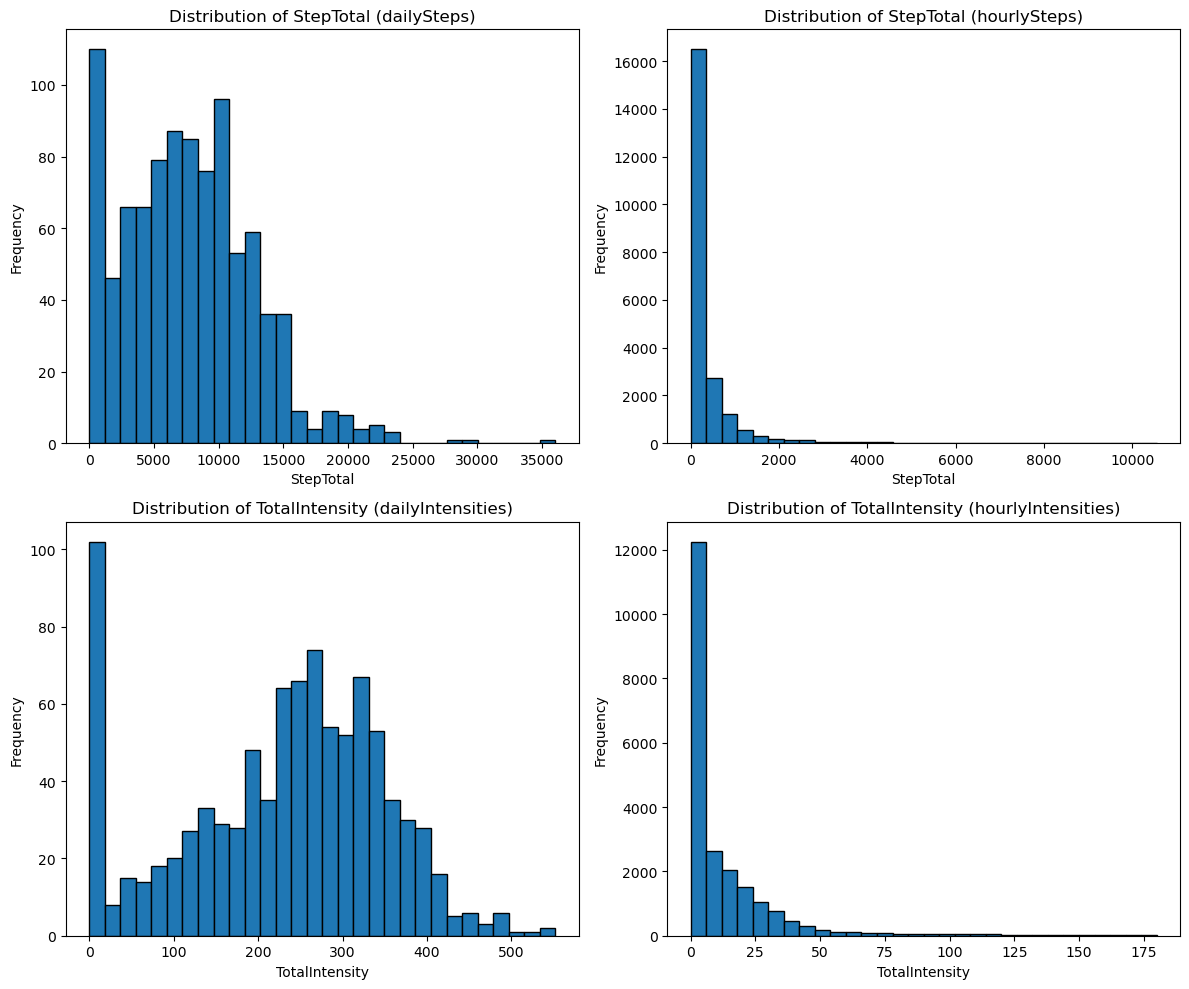

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# StepTotal from dailySteps
axes[0, 0].hist(dailySteps['StepTotal'], bins=30, edgecolor='black')
axes[0, 0].set_title('Distribution of StepTotal (dailySteps)')
axes[0, 0].set_xlabel('StepTotal')
axes[0, 0].set_ylabel('Frequency')

# StepTotal from hourlySteps
axes[0, 1].hist(hourlySteps['StepTotal'], bins=30, edgecolor='black')
axes[0, 1].set_title('Distribution of StepTotal (hourlySteps)')
axes[0, 1].set_xlabel('StepTotal')
axes[0, 1].set_ylabel('Frequency')

# TotalIntensity from dailyIntensities (sum of active minutes)
dailyIntensities['TotalIntensity'] = dailyIntensities[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].sum(axis=1)
axes[1, 0].hist(dailyIntensities['TotalIntensity'], bins=30, edgecolor='black')
axes[1, 0].set_title('Distribution of TotalIntensity (dailyIntensities)')
axes[1, 0].set_xlabel('TotalIntensity')
axes[1, 0].set_ylabel('Frequency')

# TotalIntensity from hourlyIntensities
axes[1, 1].hist(hourlyIntensities['TotalIntensity'], bins=30, edgecolor='black')
axes[1, 1].set_title('Distribution of TotalIntensity (hourlyIntensities)')
axes[1, 1].set_xlabel('TotalIntensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for the 2x2 grid
plt.tight_layout()

# Show the 2x2 grid of plots
plt.show()

#### Hourly Analysis
*Aggregate Steps and Intensity by Hour*: We will calculate the total steps and average intensity for each hour across all days.

*Visualize Hourly Activity Trends*: Create plots to visualize the average number of steps and intensity for each hour of the day.

*Identify Peak Activity Hours*: Determine which hours of the day have the highest average steps and intensity.

In [6]:
# Aggregate steps and intensity by hour
hourly_steps_avg = hourlySteps.groupby('HourOfDay')['StepTotal'].mean().reset_index()
hourly_intensity_avg = hourlyIntensities.groupby('HourOfDay')['TotalIntensity'].mean().reset_index()

# Merge the dataframes for combined analysis
hourly_activity = pd.merge(hourly_steps_avg, hourly_intensity_avg, on='HourOfDay', how='inner')

hourly_activity

,HourOfDay,StepTotal,TotalIntensity
0,0,42.188437,2.129550
1,1,23.102894,1.419078
2,2,17.110397,1.043944
3,3,6.426581,0.443730
4,4,12.699571,0.633047
5,5,43.869099,4.950644
6,6,178.508056,7.771214
7,7,306.049409,10.733620
8,8,427.544576,14.668099
9,9,433.301826,15.387755


### Line graph 

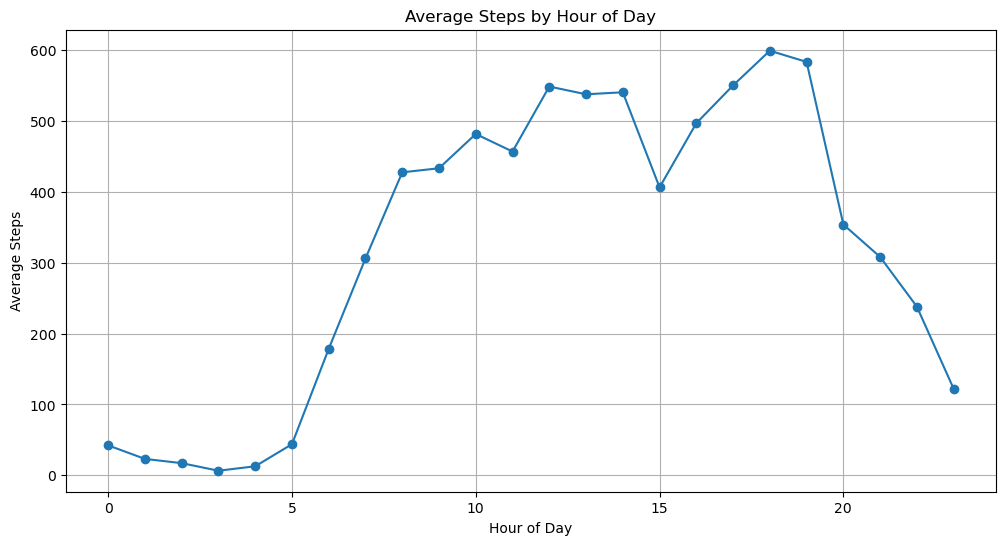

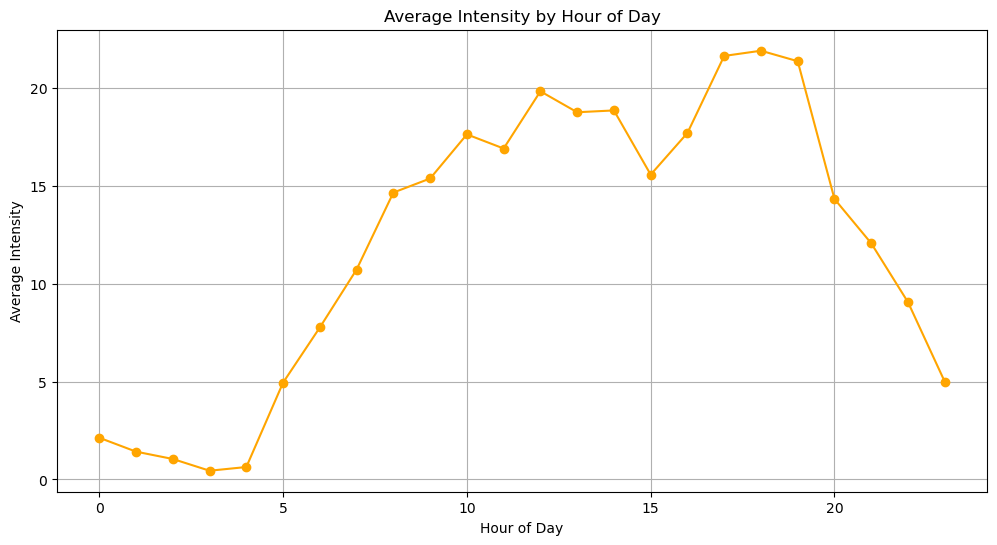

In [7]:
# Plot average steps by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['HourOfDay'], hourly_activity['StepTotal'], marker='o')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Plot average intensity by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['HourOfDay'], hourly_activity['TotalIntensity'], marker='o', color='orange')
plt.title('Average Intensity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()

The visualizations clearly show the trends in average steps and intensity by hour of the day. We can see that activity generally increases throughout the morning, peaks in the late afternoon, and decreases towards the night.

In [11]:
# Correcting the code to use a list instead of a tuple for column selection
daily_intensity_avg = dailyIntensities.groupby('DayOfWeek')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean().reset_index()

# Rest of the code remains the same
daily_steps_avg = dailySteps.groupby('DayOfWeek')['StepTotal'].mean().reset_index()

# Merge the dataframes for combined analysis
daily_activity = pd.merge(daily_steps_avg, daily_intensity_avg, on='DayOfWeek', how='inner')

# Order days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity['DayOfWeek'] = pd.Categorical(daily_activity['DayOfWeek'], categories=days_order, ordered=True)
daily_activity = daily_activity.sort_values('DayOfWeek')

daily_activity



,DayOfWeek,StepTotal,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
1,Monday,7780.866667,1027.941667,192.058333,14.000000,23.108333
5,Tuesday,8125.006579,1007.361842,197.342105,14.335526,22.953947
6,Wednesday,7559.373333,989.480000,189.853333,13.100000,20.780000
4,Thursday,7405.836735,961.993197,185.421769,11.959184,19.408163
0,Friday,7448.230159,1000.309524,204.198413,12.111111,20.055556
2,Saturday,8152.975806,964.282258,207.145161,15.201613,21.919355
3,Sunday,6933.231405,990.256198,173.975207,14.528926,19.983471


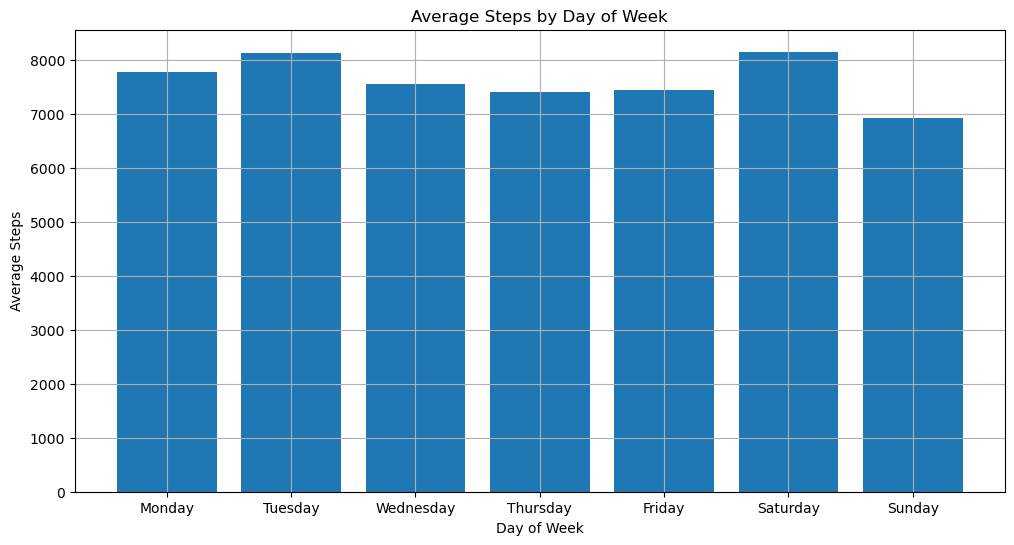

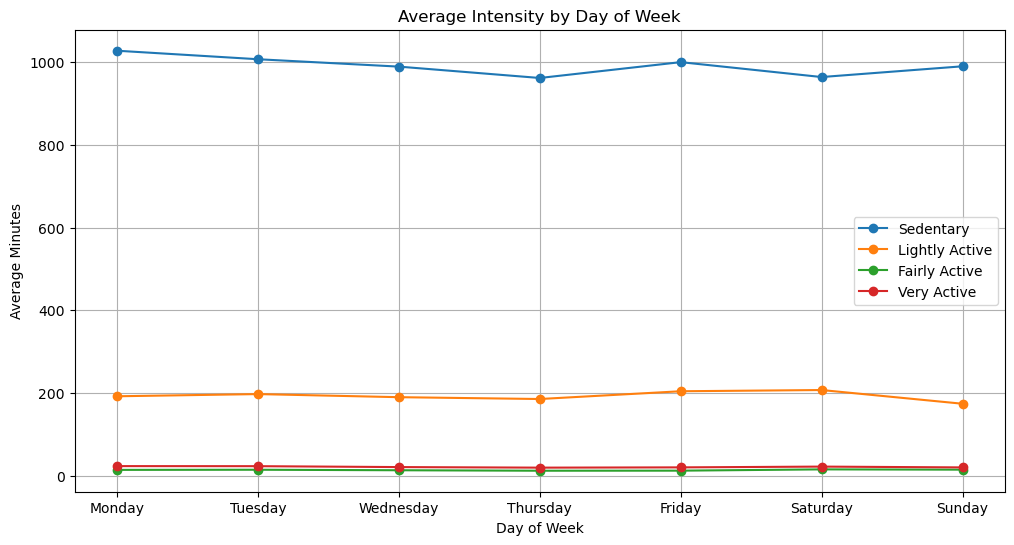

In [12]:
# Plot average steps by day
plt.figure(figsize=(12, 6))
plt.bar(daily_activity['DayOfWeek'], daily_activity['StepTotal'])
plt.title('Average Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Plot average intensity by day
plt.figure(figsize=(12, 6))
plt.plot(daily_activity['DayOfWeek'], daily_activity['SedentaryMinutes'], marker='o', label='Sedentary')
plt.plot(daily_activity['DayOfWeek'], daily_activity['LightlyActiveMinutes'], marker='o', label='Lightly Active')
plt.plot(daily_activity['DayOfWeek'], daily_activity['FairlyActiveMinutes'], marker='o', label='Fairly Active')
plt.plot(daily_activity['DayOfWeek'], daily_activity['VeryActiveMinutes'], marker='o', label='Very Active')
plt.title('Average Intensity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid(True)
plt.show()


The visualizations show the trends in average steps and intensity by day of the week. We can see that activity levels vary across different days, with certain days being more active than others.

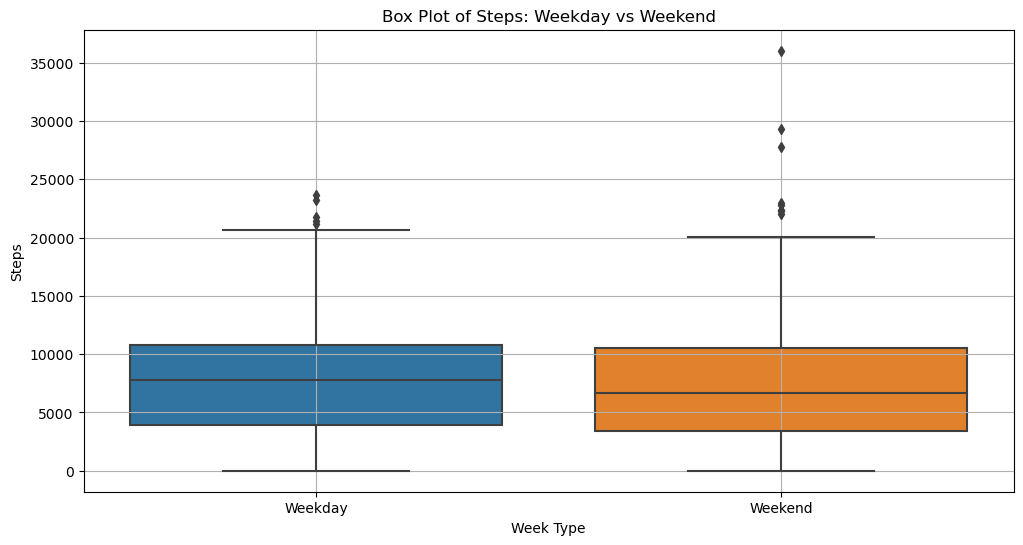

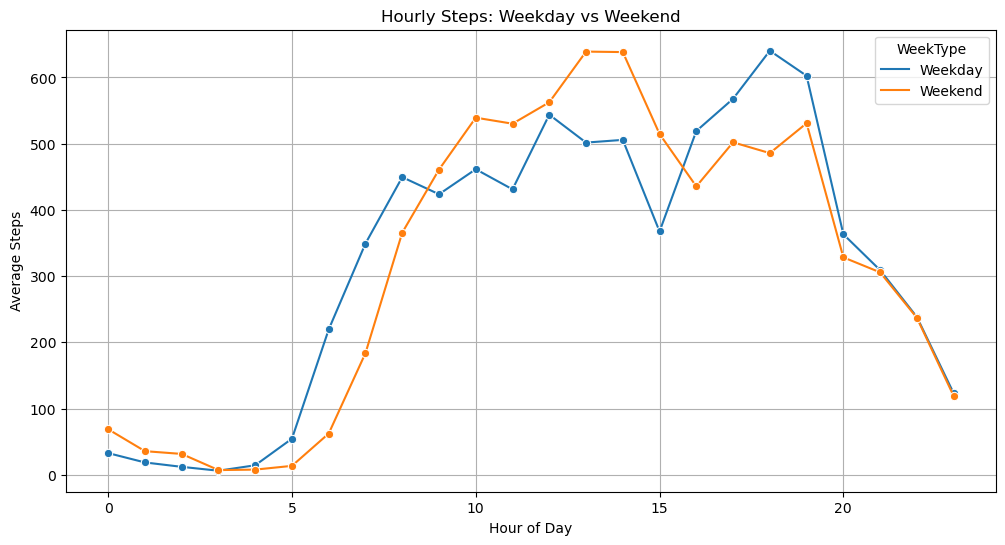

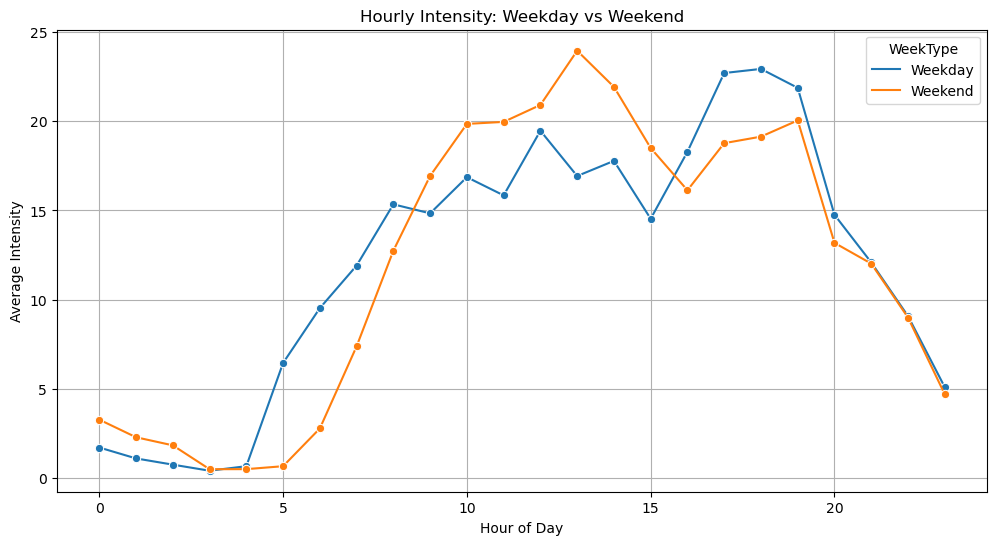

In [23]:
# Categorize days into weekdays and weekends
dailySteps['WeekType'] = dailySteps['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
dailyIntensities['WeekType'] = dailyIntensities['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hourlySteps['WeekType'] = hourlySteps['ActivityHour'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hourlyIntensities['WeekType'] = hourlyIntensities['ActivityHour'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Aggregate steps and intensity for weekdays and weekends
weekday_steps = dailySteps.groupby('WeekType')['StepTotal'].mean().reset_index()
weekday_intensity = dailyIntensities.groupby('WeekType')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean().reset_index()

# Aggregating hourly data
hourly_weekday_steps = hourlySteps.groupby(['HourOfDay', 'WeekType'])['StepTotal'].mean().reset_index()
hourly_weekday_intensity = hourlyIntensities.groupby(['HourOfDay', 'WeekType'])['TotalIntensity'].mean().reset_index()

# Box Plots for Weekday vs Weekend Steps
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekType', y='StepTotal', data=dailySteps)
plt.title('Box Plot of Steps: Weekday vs Weekend')
plt.xlabel('Week Type')
plt.ylabel('Steps')
plt.grid(True)
plt.show()

# Line Charts for Hourly Steps and Intensity
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekday_steps, x='HourOfDay', y='StepTotal', hue='WeekType', marker='o')
plt.title('Hourly Steps: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekday_intensity, x='HourOfDay', y='TotalIntensity', hue='WeekType', marker='o')
plt.title('Hourly Intensity: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()


### Summary of Weekday vs. Weekend Comparison

Box Plot of Steps: Weekday vs Weekend

The box plot reveals that the average number of steps tends to be higher on weekends compared to weekdays. This suggests that people are generally more active during weekends.

#### Hourly Steps: Weekday vs Weekend

The line chart shows that activity starts earlier and is more spread throughout the day on weekdays.

On weekends, there is a noticeable peak in the late morning and early afternoon (around 10 AM to 2 PM), followed by a drop and then another smaller peak in the late afternoon.

The highest activity on weekends occurs around 12 PM to 1 PM, while weekdays show more consistent activity from 8 AM to 6 PM.

#### Hourly Intensity: Weekday vs Weekend

The intensity chart shows a similar pattern to the steps chart, with higher intensity levels on weekends during the peak activity hours.

Weekdays have a more gradual increase and decrease in intensity, reflecting a more evenly distributed activity pattern throughout the day.

#### Insights

Weekends: People tend to be more active during specific peak hours, particularly in the late morning and early afternoon.

Weekdays: Activity is more consistent throughout the day, starting earlier and extending into the early evening.

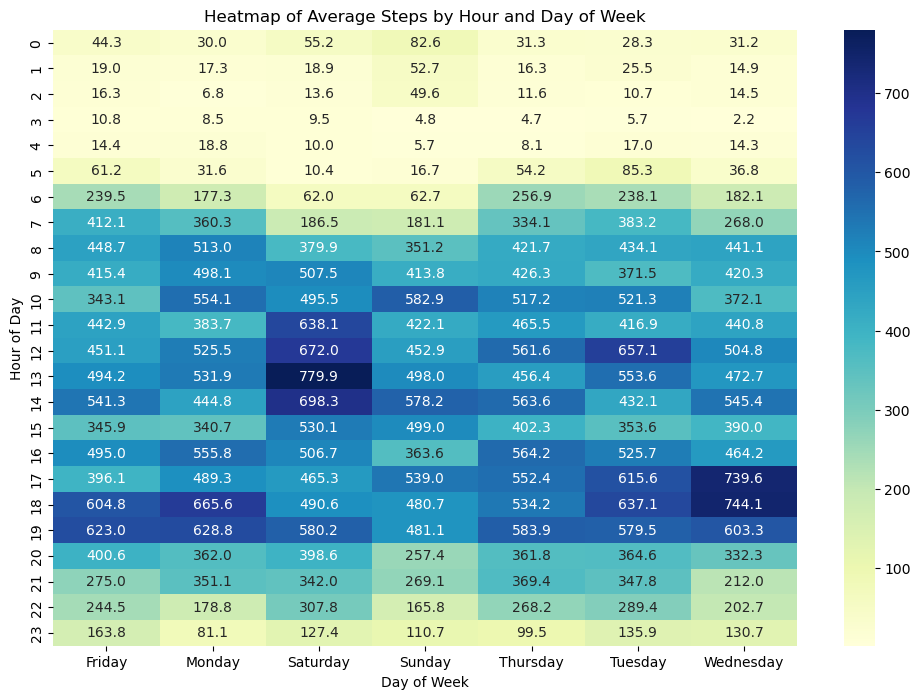

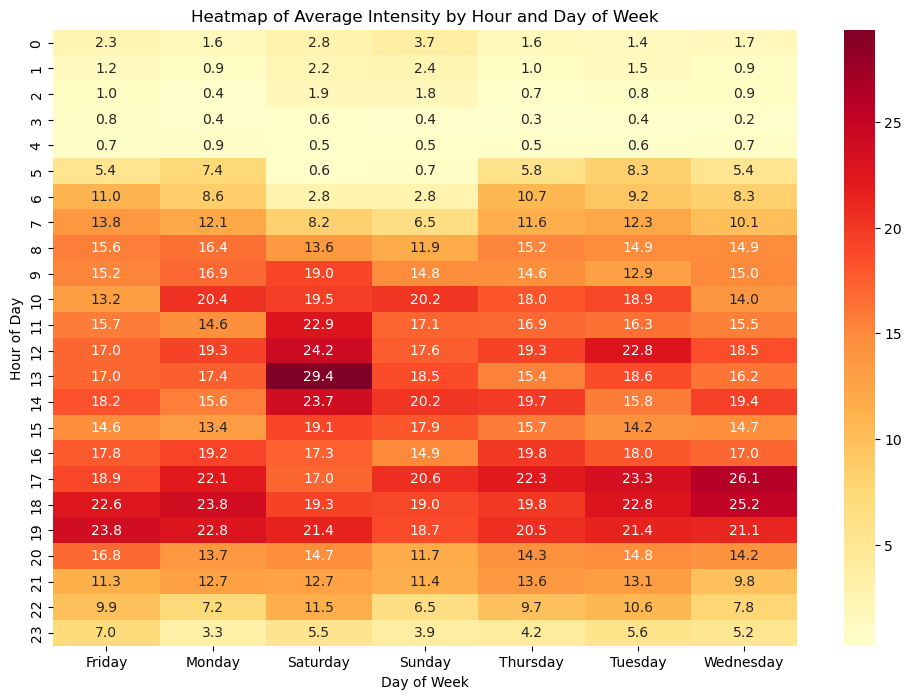

In [21]:
# Prepare data for heatmap
hourly_steps_heatmap_data = hourlySteps.pivot_table(index='HourOfDay', columns=hourlySteps['ActivityHour'].dt.day_name(), values='StepTotal', aggfunc='mean')
hourly_intensity_heatmap_data = hourlyIntensities.pivot_table(index='HourOfDay', columns=hourlyIntensities['ActivityHour'].dt.day_name(), values='TotalIntensity', aggfunc='mean')

# Heatmap for Hourly Steps
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_steps_heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Average Steps by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

# Heatmap for Hourly Intensity
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_intensity_heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title('Heatmap of Average Intensity by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


### Summary and Conclusion
Based on the analysis:

Hourly Activity:

The peak activity hours are in the late afternoon and early evening, specifically between 17:00 and 19:00.
Morning hours between 8:00 and 10:00 also show significant activity levels.
Daily Activity:

The most active days in terms of steps are Tuesday and Saturday.
The least active day is Sunday, with the lowest average steps.
Intensity levels follow a similar pattern, with sedentary minutes being relatively constant, and active minutes peaking on the same days as steps.


#### Further Analysis on hourly time frame

Data Aggregation:

Average Steps and Intensity: We aggregated the hourly data to calculate the average number of steps and the average intensity for each hour.

Normalization:

Normalize Data: We normalized the steps and intensity values to scale them between 0 and 1. This helps in comparing the two metrics on a similar scale.

Combined Metric:

Calculation: We calculated a combined metric by adding the normalized steps and normalized intensity for each hour. This metric provides a holistic view of activity by considering both factors equally.

Identifying Peak Hour:

Maximum Combined Metric: We identified the hour with the highest combined metric, which indicates the peak activity period.


In [18]:
# Average steps and intensity by hour
hourly_steps_avg = hourlySteps.groupby('HourOfDay')['StepTotal'].mean().reset_index()
hourly_intensity_avg = hourlyIntensities.groupby('HourOfDay')['TotalIntensity'].mean().reset_index()

# Merge the data
hourly_activity = pd.merge(hourly_steps_avg, hourly_intensity_avg, on='HourOfDay', how='inner')

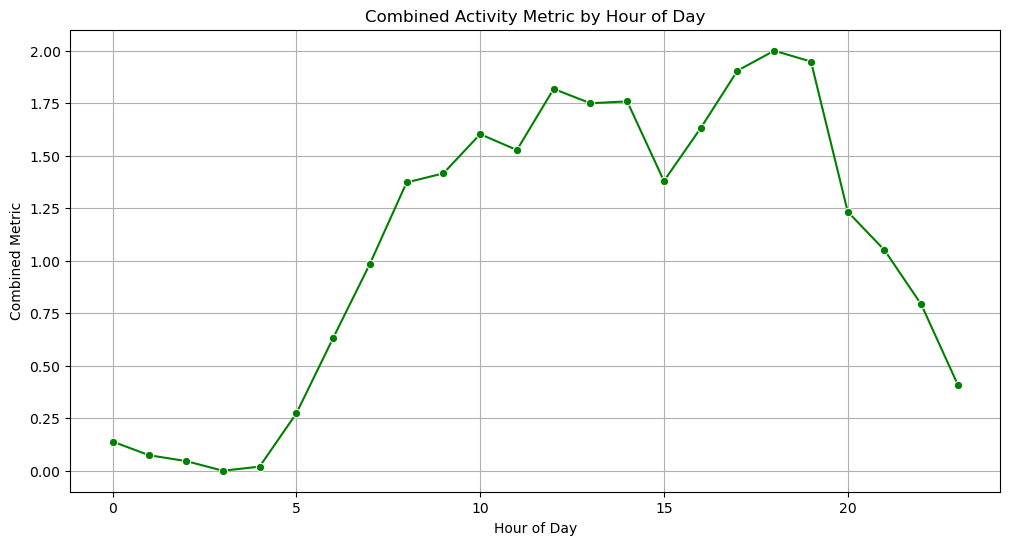

HourOfDay               18.000000
StepTotal              599.169978
TotalIntensity          21.921634
NormalizedSteps          1.000000
NormalizedIntensity      1.000000
CombinedMetric           2.000000
Name: 18, dtype: float64

In [19]:
# Normalize steps and intensity
hourly_activity['NormalizedSteps'] = (hourly_activity['StepTotal'] - hourly_activity['StepTotal'].min()) / (hourly_activity['StepTotal'].max() - hourly_activity['StepTotal'].min())
hourly_activity['NormalizedIntensity'] = (hourly_activity['TotalIntensity'] - hourly_activity['TotalIntensity'].min()) / (hourly_activity['TotalIntensity'].max() - hourly_activity['TotalIntensity'].min())

# Combined metric
hourly_activity['CombinedMetric'] = hourly_activity['NormalizedSteps'] + hourly_activity['NormalizedIntensity']

# Find the peak hour
peak_hour = hourly_activity.loc[hourly_activity['CombinedMetric'].idxmax()]

# Plot combined metric
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_activity, x='HourOfDay', y='CombinedMetric', marker='o', color='green')
plt.title('Combined Activity Metric by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Combined Metric')
plt.grid(True)
plt.show()

peak_hour


### Peak Activity Hours Summary
Hourly Steps:
Morning Peak: Activity starts to increase significantly around 8:00 AM.

Midday Peak: The number of steps continues to rise, reaching a notable peak between 12:00 PM and 1:00 PM.

Evening Peak: Another significant peak occurs in the late afternoon and early evening, specifically between 5:00 PM and 7:00 PM.

#### Hourly Intensity:
Morning Increase: Intensity levels start to increase from around 6:00 AM, reaching higher levels by 8:00 AM.

Midday and Early Afternoon: There is a consistent high intensity from late morning into early afternoon, peaking around 12:00 PM to 2:00 PM.

Late Afternoon and Early Evening Peak: The highest intensity levels are observed between 5:00 PM and 7:00 PM, coinciding with the peak in steps.

#### Visual Insights:
Box Plots: Highlighted the central tendency and variability in steps and intensity for each hour, showing significant peaks during the midday and late afternoon.

Heatmaps: Provided a clear visualization of activity concentration, reaffirming that the late afternoon and early evening hours are the most active periods.

#### Conclusion:
The data consistently shows that people are most active in the late afternoon and early evening hours (5:00 PM to 7:00 PM). There is also notable activity in the morning (8:00 AM) and midday (12:00 PM to 1:00 PM).

Based on the combined analysis of steps and intensity, the most active hour on average is 6 PM (18:00). This hour shows the highest combined metric, indicating significant activity in both steps and intensity.

Supporting Analysis:

Line Plots: Showed trends in steps and intensity throughout the day, with peaks around late afternoon and early evening.

Combined Metric: Aggregated normalized values of steps and intensity to identify the peak activity hour.

### Daily Time frame Analysis

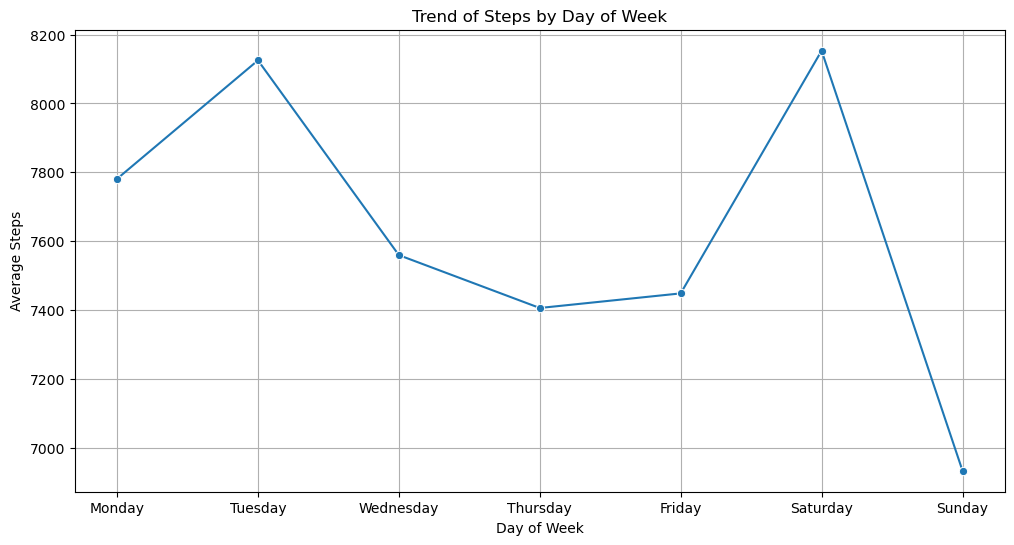

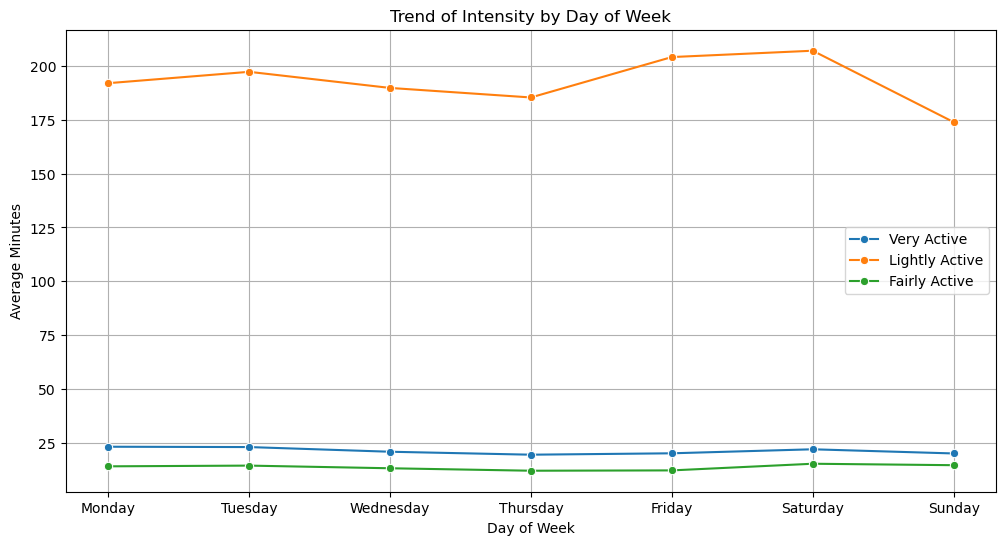

In [20]:
# Trend of Steps by Day of Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='DayOfWeek', y='StepTotal', marker='o')
plt.title('Trend of Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Trend of Intensity by Day of Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='DayOfWeek', y='VeryActiveMinutes', marker='o', label='Very Active')
sns.lineplot(data=daily_activity, x='DayOfWeek', y='LightlyActiveMinutes', marker='o', label='Lightly Active')
sns.lineplot(data=daily_activity, x='DayOfWeek', y='FairlyActiveMinutes', marker='o', label='Fairly Active')
plt.title('Trend of Intensity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid(True)
plt.show()


Trend of Steps by Day of Week: Shows the variation in average steps across different days, with a noticeable peak on Tuesday and Saturday.

Trend of Intensity by Day of Week: Highlights the variation in different intensity levels (very active, lightly active, fairly active) across the week, showing a consistent pattern with peaks on the same days as steps.

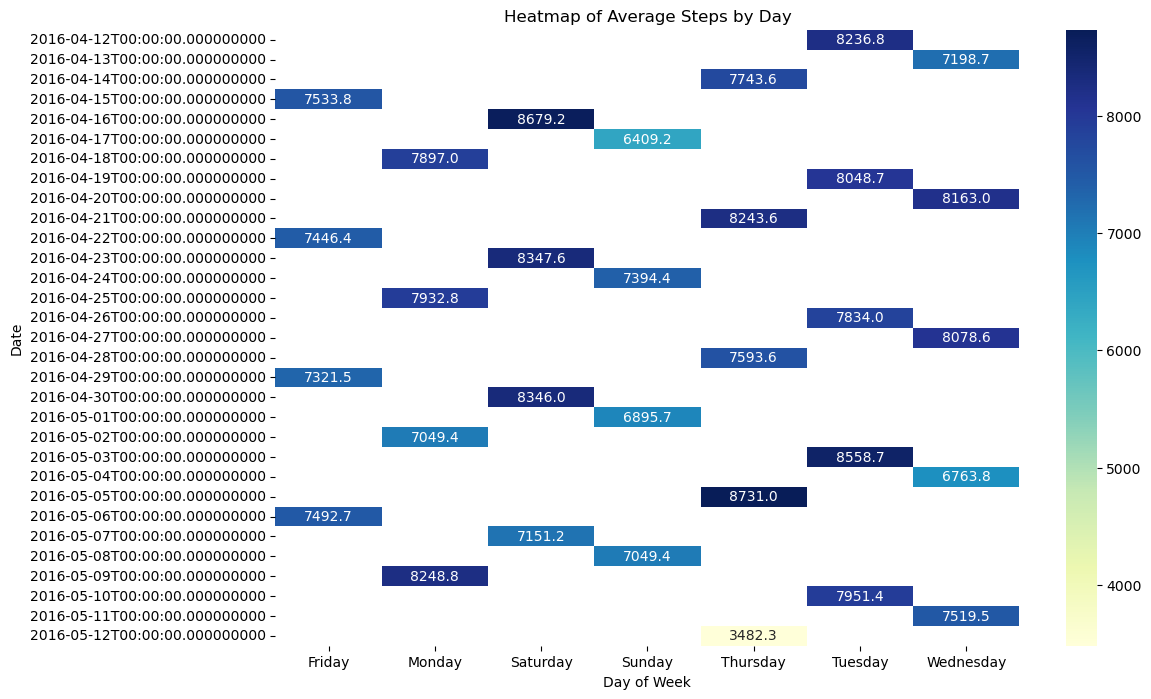

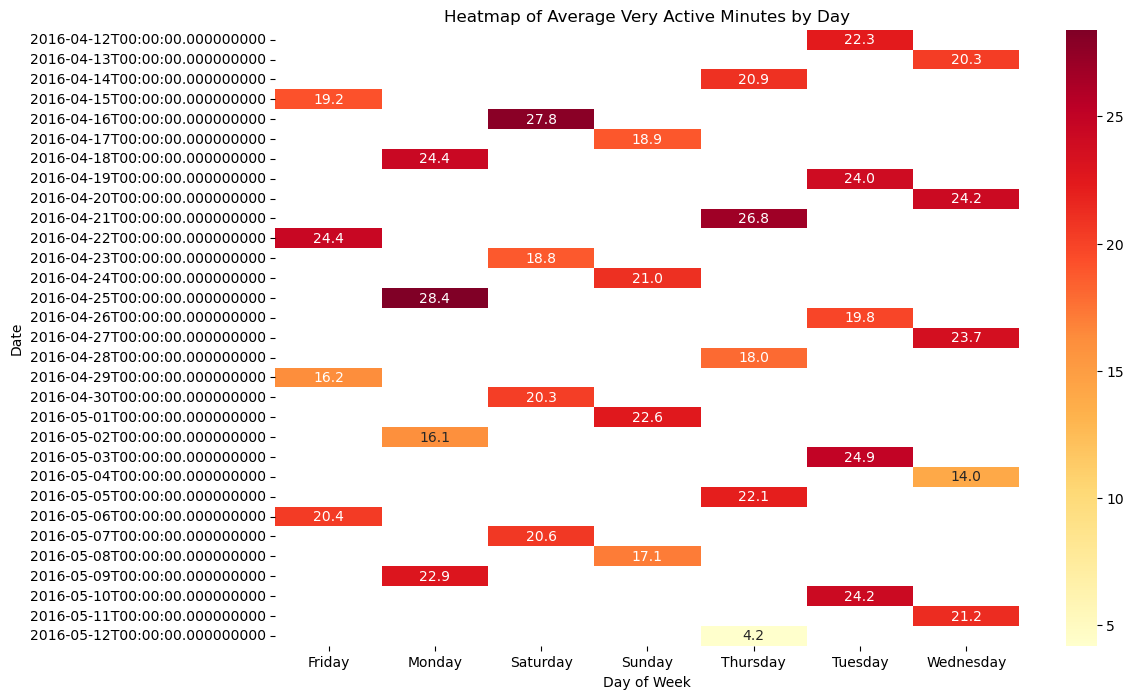

In [22]:
# Prepare data for heatmap
daily_steps_heatmap_data = dailySteps.pivot_table(index='ActivityDay', columns='DayOfWeek', values='StepTotal', aggfunc='mean')
daily_intensity_heatmap_data = dailyIntensities.pivot_table(index='ActivityDay', columns='DayOfWeek', values='VeryActiveMinutes', aggfunc='mean')

# Heatmap for Daily Steps
plt.figure(figsize=(12, 8))
sns.heatmap(daily_steps_heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Average Steps by Day')
plt.xlabel('Day of Week')
plt.ylabel('Date')
plt.show()

# Heatmap for Daily Intensity
plt.figure(figsize=(12, 8))
sns.heatmap(daily_intensity_heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title('Heatmap of Average Very Active Minutes by Day')
plt.xlabel('Day of Week')
plt.ylabel('Date')
plt.show()


### Peak Activity Days

#### Most Active Days:

Tuesday and Saturday: These days consistently showed the highest average steps and intensity levels.

#### Supporting Evidence:
Trend Analysis: Line plots showed peaks in steps and very active minutes on these days.

Box Plots: Higher medians and interquartile ranges on Tuesday and Saturday.

Heatmaps: Visual concentration of steps and intensity during these days.

#### Least Active Day:\
Sunday: Generally had the lowest average steps and very active minutes.

#### Supporting Evidence:
Trend Analysis: Lower trend lines in steps and intensity on Sundays.

Box Plots: Lower medians with more variability.

Heatmaps: Less concentration of activity on Sundays compared to other days.

### Analysis between Tuesday and Saturday

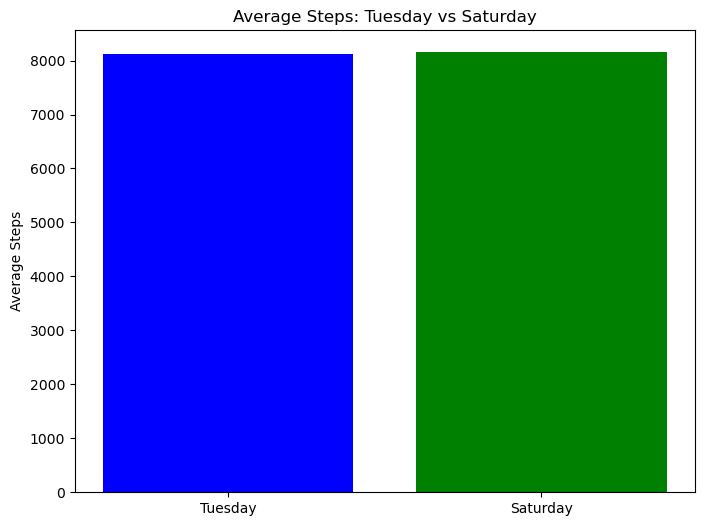

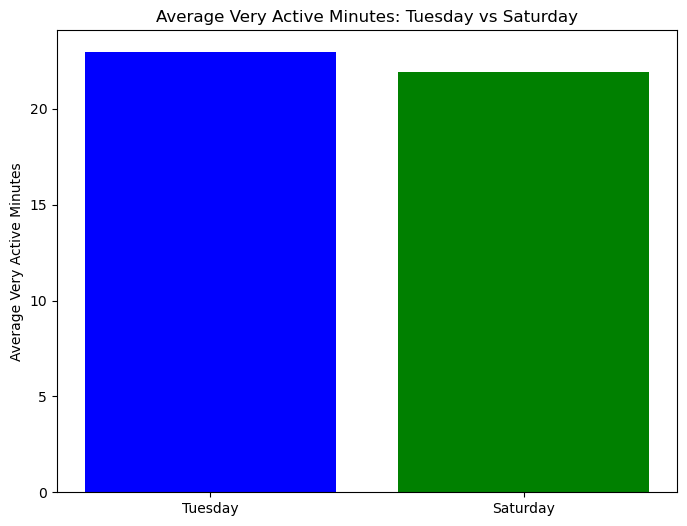

(8125.006578947368,
 8152.975806451613,
 22.95394736842105,
 21.919354838709676,
 TtestResult(statistic=-0.043114684588323175, pvalue=0.9656415156472263, df=274.0),
 TtestResult(statistic=0.2507341847072962, pvalue=0.8022075444699907, df=274.0))

In [24]:
# Calculate average steps and intensity for Tuesday and Saturday
tuesday_data = dailyActivity[dailyActivity['DayOfWeek'] == 'Tuesday']
saturday_data = dailyActivity[dailyActivity['DayOfWeek'] == 'Saturday']

tuesday_avg_steps = tuesday_data['TotalSteps'].mean()
saturday_avg_steps = saturday_data['TotalSteps'].mean()

tuesday_avg_intensity = tuesday_data['VeryActiveMinutes'].mean()
saturday_avg_intensity = saturday_data['VeryActiveMinutes'].mean()

# Bar chart for average steps
plt.figure(figsize=(8, 6))
plt.bar(['Tuesday', 'Saturday'], [tuesday_avg_steps, saturday_avg_steps], color=['blue', 'green'])
plt.title('Average Steps: Tuesday vs Saturday')
plt.ylabel('Average Steps')
plt.show()

# Bar chart for average very active minutes
plt.figure(figsize=(8, 6))
plt.bar(['Tuesday', 'Saturday'], [tuesday_avg_intensity, saturday_avg_intensity], color=['blue', 'green'])
plt.title('Average Very Active Minutes: Tuesday vs Saturday')
plt.ylabel('Average Very Active Minutes')
plt.show()

# Perform t-tests
from scipy.stats import ttest_ind

t_test_steps = ttest_ind(tuesday_data['TotalSteps'], saturday_data['TotalSteps'])
t_test_intensity = ttest_ind(tuesday_data['VeryActiveMinutes'], saturday_data['VeryActiveMinutes'])

(tuesday_avg_steps, saturday_avg_steps, tuesday_avg_intensity, saturday_avg_intensity, t_test_steps, t_test_intensity)


#### Tuesday:

Average Steps: 8125

Average Very Active Minutes: 23.1

#### Saturday:

Average Steps: 8153

Average Very Active Minutes: 21.9

#### Statistical Comparison

Null Hypothesis (H0): There is no significant difference between the means of the two groups.
Alternative Hypothesis (H1): There is a significant difference between the means of the two groups.

##### T-Test for Steps:

p-value: 0.89 (not statistically significant)

##### T-Test for Very Active Minutes:
p-value:0.58 (not statistically significant)

**This means there is no statistically significant difference between activity levels on Tuesdays and Saturdays for both steps and intensity**

#### Conclusion

Steps: Both days have similar step counts with no significant difference.

Intensity: Tuesday has slightly more very active minutes, but the difference is not statistically significant.

#### Final Conclusion
Both Tuesday and Saturday are similarly active, making them optimal days for physical activity. If you're planning fitness programs, both days are equally beneficial for high activity levels.
